1: Logistic Regression

2: Naive Bayes Classifier

3: Support Vector Machines

4: Decision Trees

5: Random Forest

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report , confusion_matrix
from sklearn import metrics

## Importing Data and Overview

In [2]:
pima = pd.read_csv('/Users/Shared/Shyam/Datasets/diabetes.csv')

In [3]:
pima.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#Statistical summary

pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


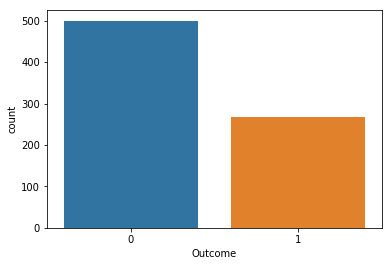

In [6]:
# Visualising Outcome

sns.countplot(pima['Outcome'])

plt.show()

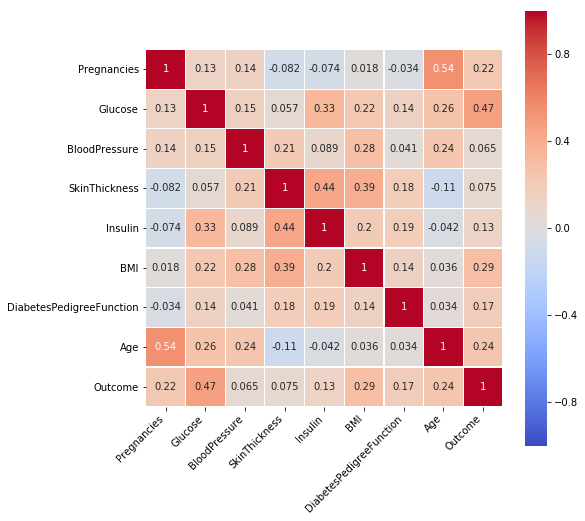

In [7]:
# Heatmap for visualising correlation

fig , ax = plt.subplots(figsize = (8 , 8)) 

sns.heatmap(pima.corr() , vmin = -1 , vmax = 1 , center = 0 , square = True , 
                 cmap = 'coolwarm' , linewidths = 0.2 , annot = True)

ax.set_xticklabels(ax.get_xticklabels() , rotation = 45 , horizontalalignment = 'right')

plt.show()

## Data Cleaning

In [8]:
#Converting zeroes of certain feature columns to NaN

cols = ['Glucose' , 'BloodPressure' , 'SkinThickness' , 'Insulin' , 'BMI']
pima[cols] = pima[cols].replace(0 , np.nan)
pima.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

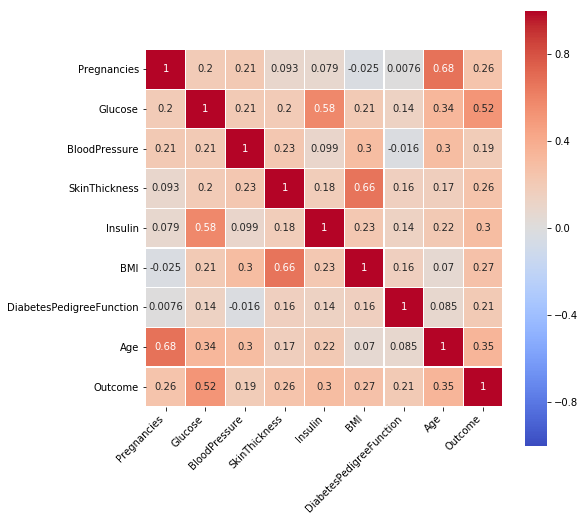

In [9]:
# Dropping all NaN values and creating a heatmap to check if any column can be dropped

pima_2 = pima.dropna()

fig , ax = plt.subplots(figsize = (8 , 8))

sns.heatmap(pima_2.corr() , vmin = -1 , vmax = 1 , center = 0 , square = True , cmap = 'coolwarm' , 
            linewidths = 0.2 , annot = True)

ax.set_xticklabels(ax.get_xticklabels() , rotation = 45 , horizontalalignment = 'right')

plt.show()

All features seem to be having similar correlation with the target variable.

In [10]:
#Dropping rows with null BMI and Glucose values

pima.dropna(subset = ['Glucose' , 'BMI'] , inplace = True)
pima.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                28
SkinThickness               218
Insulin                     360
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [11]:
#Imputing BloodPressure values

pima['BloodPressure'].fillna(method = 'ffill' , inplace = True)

In [12]:
#Imputing Insulin values

insulin = pima[['Glucose' , 'Insulin']].copy()
insulin['value'] = 1
insulin.loc[(insulin['Insulin'].isnull()) , 'value'] = 0
insulin.head()
insulin2 = insulin.dropna()

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

y = insulin2.Insulin
X = insulin2.Glucose

lm = LinearRegression().fit(X.values.reshape(-1 , 1) , y.values.reshape(-1 , 1))
insulin.loc[(insulin['Insulin'].isnull()) , 'Insulin'] = lm.predict(insulin.loc[(insulin['Insulin'].isnull()) ,
                                                                                'Glucose'].values.reshape(-1 , 1))    
pima['Insulin'] = insulin['Insulin']

In [14]:
# Imputing SkinThickness values

thickness = pima_2.groupby('Outcome').agg({'SkinThickness' : 'median'})
thickness

,SkinThickness
Outcome,
0,27.0
1,33.0


In [15]:
pima.loc[(pima['SkinThickness'].isnull()) & (pima['Outcome'] == 0) , 'SkinThickness'] = 27
pima.loc[(pima['SkinThickness'].isnull()) & (pima['Outcome'] == 1) , 'SkinThickness'] = 33

In [16]:
pima.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Machine Learning

In [17]:
# Feature Scaling

from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
scaled = scaler.fit_transform(pima.drop(['Outcome'] , axis = 1))
scaled_df = pd.DataFrame(scaled)
scaled_df.head()

/Users/Shared/Shyam/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,0,1,2,3,4,5,6,7
0,0.352941,0.670968,0.489796,0.304348,0.268816,0.314928,0.234415,0.483333
1,0.058824,0.264516,0.428571,0.239130,0.105976,0.171779,0.116567,0.166667
2,0.470588,0.896774,0.408163,0.282609,0.359283,0.104294,0.253629,0.183333
3,0.058824,0.290323,0.428571,0.173913,0.131570,0.202454,0.038002,0.000000
4,0.000000,0.600000,0.163265,0.304348,0.217027,0.509202,0.943638,0.200000


In [18]:
#Splitting data into training and testing sets

from sklearn.model_selection import train_test_split

y = pima.Outcome
X = scaled_df

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 42)

print('Shape of X_train: ' , X_train.shape)
print('Shape of y_train: ' , y_train.shape)
X_train.head()

Shape of X_train:  (526, 8)
Shape of y_train:  (526,)


,0,1,2,3,4,5,6,7
223,0.235294,0.632258,0.632653,0.282609,0.253307,0.527607,0.242101,0.016667
371,0.000000,0.393548,0.448980,0.163043,0.157671,0.036810,0.067464,0.016667
409,0.176471,0.548387,0.408163,0.239130,0.155821,0.167689,0.060205,0.116667
362,0.000000,0.258065,0.408163,0.163043,0.099235,0.359918,0.199402,0.000000
306,0.176471,0.445161,0.265306,0.032609,0.121177,0.231084,0.233988,0.066667


In [19]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(solver = 'liblinear')
logmodel.fit(X_train , y_train)
prediction_log = logmodel.predict(X_test)
print('Classification Report: ' , classification_report(y_test , prediction_log) , sep = '\n')
print('\nConfusion matrix: ' , confusion_matrix(y_test , prediction_log) , sep = '\n')
print('\nAccuracy: ' , metrics.accuracy_score(y_test , prediction_log))

Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.93      0.84       143
           1       0.80      0.49      0.61        83

   micro avg       0.77      0.77      0.77       226
   macro avg       0.78      0.71      0.72       226
weighted avg       0.78      0.77      0.75       226


Confusion matrix: 
[[133  10]
 [ 42  41]]

Accuracy:  0.7699115044247787


In [20]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train , y_train)
prediction_gnb = gnb.predict(X_test)
print(classification_report(y_test , prediction_gnb))
print('\nConfusion matrix: ' , confusion_matrix(y_test , prediction_gnb) , sep = '\n')
print('\nAccuracy: ' , metrics.accuracy_score(y_test , prediction_gnb))

              precision    recall  f1-score   support

           0       0.78      0.87      0.83       143
           1       0.73      0.58      0.64        83

   micro avg       0.77      0.77      0.77       226
   macro avg       0.75      0.73      0.73       226
weighted avg       0.76      0.77      0.76       226


Confusion matrix: 
[[125  18]
 [ 35  48]]

Accuracy:  0.7654867256637168


In [21]:
# Support Vector Machines

from sklearn import svm , metrics , tree

svmodel = svm.SVC(gamma = 'scale')
svmodel.fit(X_train , y_train)
prediction_svm = svmodel.predict(X_test)
print(classification_report(y_test , prediction_svm))
print('\nConfusion matrix: ' , confusion_matrix(y_test , prediction_svm) , sep = '\n')
print('\nAccuracy: ' , metrics.accuracy_score(y_test , prediction_svm))

              precision    recall  f1-score   support

           0       0.76      0.93      0.83       143
           1       0.80      0.48      0.60        83

   micro avg       0.77      0.77      0.77       226
   macro avg       0.78      0.71      0.72       226
weighted avg       0.77      0.77      0.75       226


Confusion matrix: 
[[133  10]
 [ 43  40]]

Accuracy:  0.7654867256637168


In [22]:
# Decision Trees

from sklearn import tree

decision_model = tree.DecisionTreeClassifier()
decision_model.fit(X_train , y_train)
prediction_tree = decision_model.predict(X_test)
print(classification_report(y_test , prediction_tree))
print('\nConfusion matrix: ' , confusion_matrix(y_test , prediction_tree) ,sep = '\n')
print('\nAccuracy: ' , metrics.accuracy_score(y_test , prediction_tree))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       143
           1       0.65      0.66      0.65        83

   micro avg       0.74      0.74      0.74       226
   macro avg       0.72      0.73      0.73       226
weighted avg       0.74      0.74      0.74       226


Confusion matrix: 
[[113  30]
 [ 28  55]]

Accuracy:  0.7433628318584071


In [23]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

random_model = RandomForestClassifier(n_estimators = 120 , random_state = 42)
random_model.fit(X_train , y_train)
prediction_forest = random_model.predict(X_test)
print(classification_report(y_test , prediction_forest))
print('\nConfusion matrix: ' , confusion_matrix(y_test , prediction_forest) ,sep = '\n')
print('\nAccuracy: ' , metrics.accuracy_score(y_test , prediction_forest))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       143
           1       0.82      0.73      0.78        83

   micro avg       0.85      0.85      0.85       226
   macro avg       0.84      0.82      0.83       226
weighted avg       0.84      0.85      0.84       226


Confusion matrix: 
[[130  13]
 [ 22  61]]

Accuracy:  0.8451327433628318


The model with the best accuracy is Random Forest Classifier.

## Prediction

In [24]:
df = pd.DataFrame([[6 , 168 , 72 , 35 , 0 , 43.6 , 0.627 , 65]])
normal_df = scaler.transform(df)
print(random_model.predict(normal_df))

[1]
